In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from prophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

df0 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("CONVENIENT_global_deaths.csv")

14:02:59 - cmdstanpy - INFO - Chain [1] start processing
14:02:59 - cmdstanpy - INFO - Chain [1] done processing


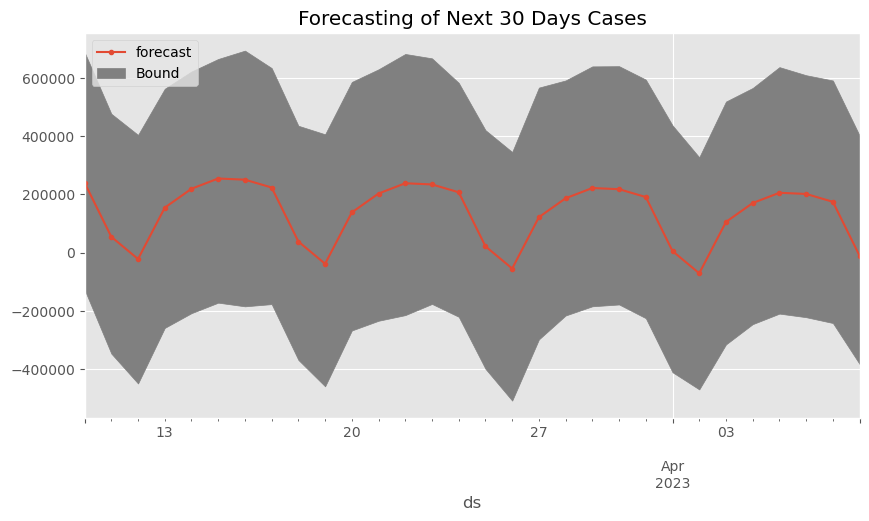

In [35]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
model.fit(df_fb)
future = model.make_future_dataframe(periods=30,freq="D")
df_forecast = model.predict(future)
#model.plot(df_forecast,xlabel="Years",ylabel="Values",figsize=(9,4))
#model.plot_components(df_forecast,figsize=(9,6))

forecast = df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="gray")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()